In [14]:
import serial
from serial.tools import list_ports

import matplotlib.pyplot as plt
import mpl_interactions.ipyplot as iplt
import numpy as np
from tqdm.notebook import trange

import asyncio
import time

In [2]:
PORT = ''
for port in list_ports.comports():
    print(port)
if len(list_ports.comports()) == 1:
    PORT = port

/dev/ttyACM1 - Pico - Board CDC


In [3]:
pico = serial.Serial(PORT.device, baudrate=115200, timeout=.1)

In [10]:
def split_bytes(uint32):
    return (uint32>>offset&0xff for offset in range(0,32,8))

In [4]:
for _ in range(10):
    rand_str = pico.read_until(b'\r').decode()
    rand = int(rand_str.split(' ')[1][:-1],16)
    print(rand, end='\n')

1471461053
1574350699
4222446934
2061134763
3740702043
3584895995
2842539349
4121737213
2944129782
1802379136


In [5]:
lim = 0x100
data = np.random.randint(lim, size=500000)
bins = np.arange(0,lim+1,1)-0.5
display(bins)

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
        26.5,  27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,
        35.5,  36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,
        44.5,  45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,
        53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,
        62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,
        71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,
        89.5,  90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,
        98.5,  99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5,
       107.5, 108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5,
       116.5, 117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5,
       125.5, 126.5,

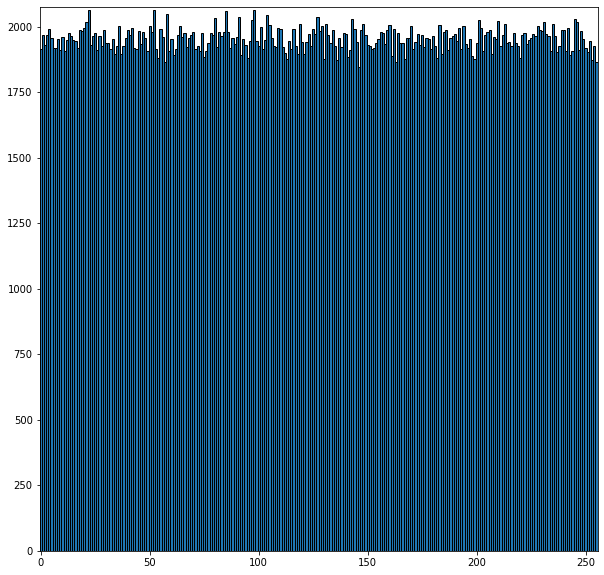

In [6]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True, figsize=(10,10))
ax.hist(data, bins=bins, edgecolor='black')
ax.margins(0,5e-3)

In [7]:
%matplotlib ipympl

In [ ]:
# https://stackoverflow.com/questions/63384326/how-to-update-interactive-figure-in-loop-with-jupyterlab/63517891#63517891

import asyncio
import time
%matplotlib widget

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)#, figsize=(20,20))

async def update():
    t0 = time.time()
    tupd = t0
    tlim = 10
    tupdinterval = 1
    figupdate = True
    x = [1]
    while time.time() - t0 < tlim:

        x.append(x[-1] + 2)
        xx = [x**2 for x in x]

        if figupdate:
            print('figupdate now')
            ax.cla()
            ax.plot(x, xx)
            fig.canvas.draw()
            print('figupdate done')
            figupdate = False
            await asyncio.sleep(1e-9) # without any sleep, it will not draw
            tupd = time.time()
        
        figupdate = not figupdate and time.time() - tupd > tupdinterval
        if figupdate:
            # update in the next loop
            print('figupdate next')


    print('time is up')


loop = asyncio.get_event_loop()
loop.create_task(update());

In [ ]:
%matplotlib ipympl

⚠️ Warning: these "live plots" are very hacky!
- Don't "run all cells" this and the next, it will all break
- Pressing stop (ctrl-c) is futile, just be patient and watch the bars
- Probably the ax.hist is blocking, so you dont get new data in the downtime

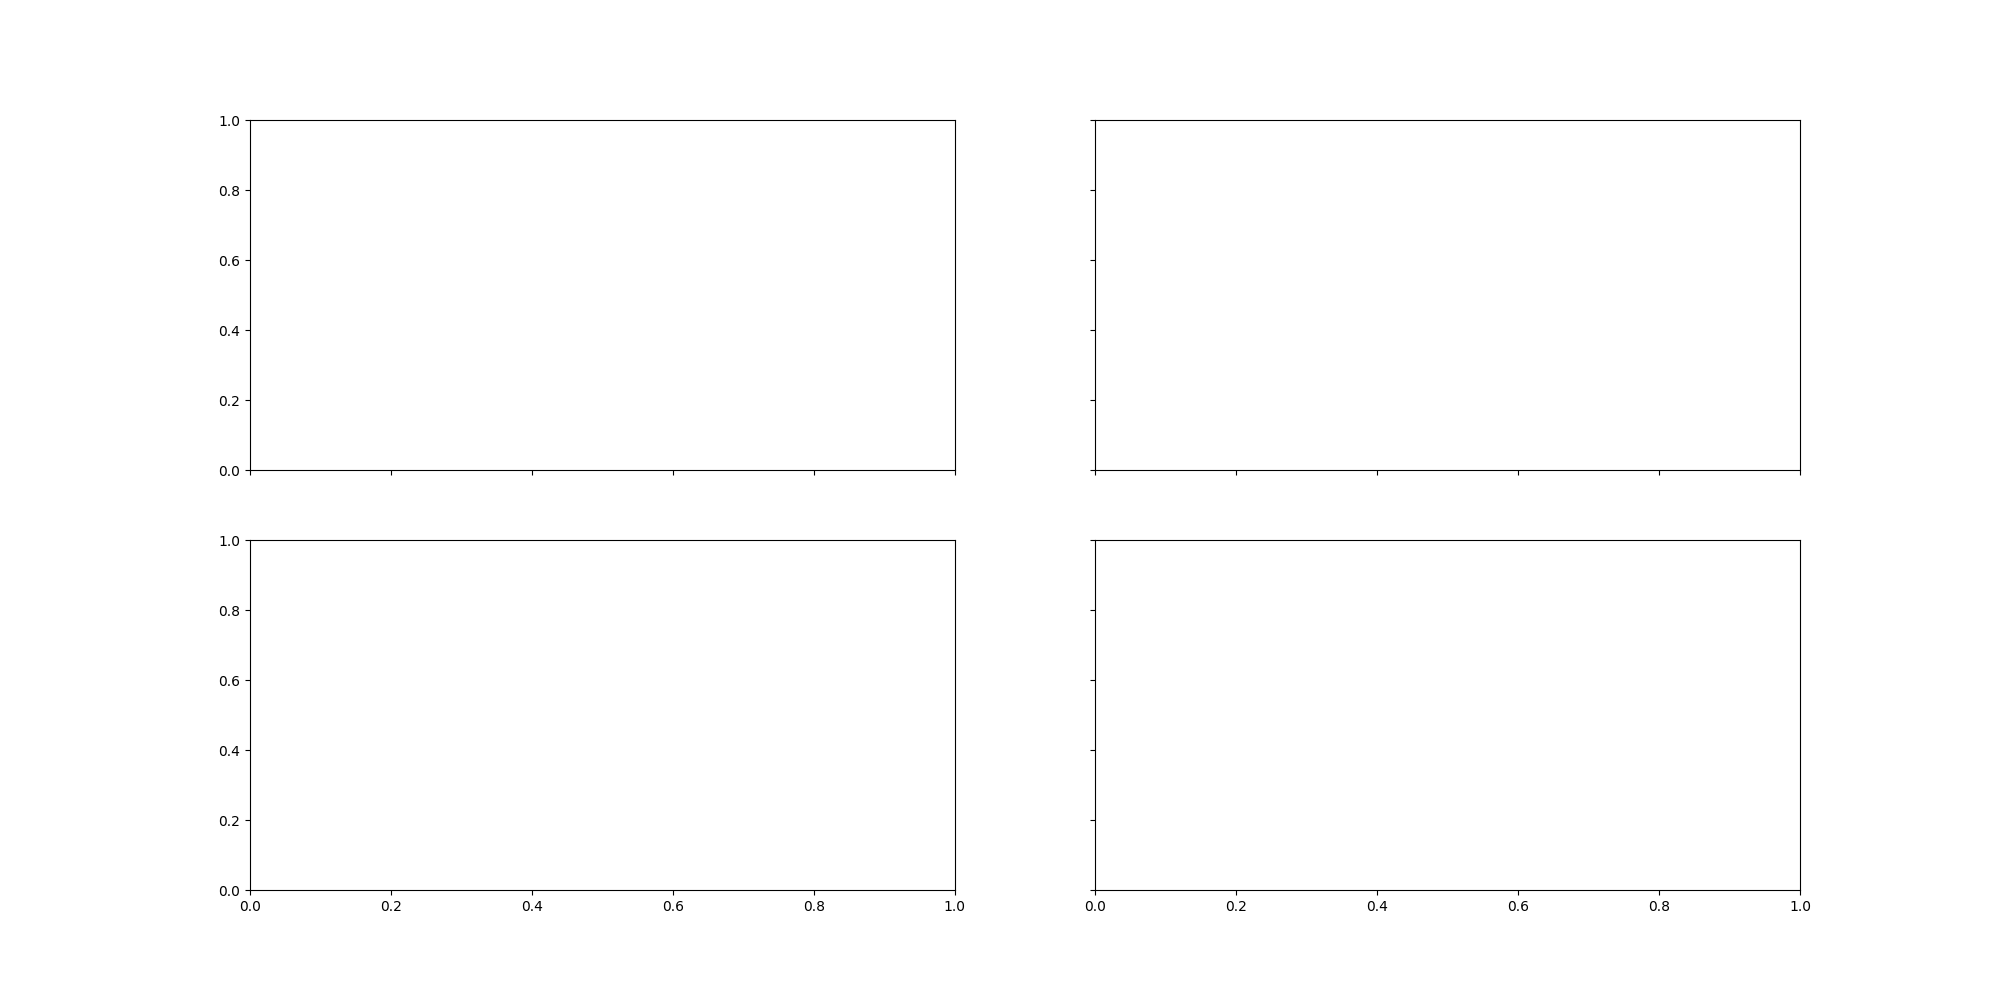

figupdate now


In [20]:
fig,axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(10*2,5*2))

async def update():
    t0 = time.time()
    tupd = t0
    tlim = 60
    tupdinterval = .5
    figupdate = True
    
    lim = 0x100000000
    data = np.random.randint(lim, size=1)
    
    bins = np.arange(0,0x100+1,1)-0.5

    while time.time() - t0 < tlim:

        data = np.append(data, np.random.randint(lim, size=1))

        if figupdate:
            print('figupdate now')
            bytes_ = split_bytes(data)
            for ax, bs in zip(axs.ravel(), bytes_):
                ax.cla()
                ax.hist(bs, bins=bins, edgecolor='black')
                ax.margins(0,5e-3)
            fig.suptitle(f'{tlim - (time.time()-t0):.2f}s remaining - np.randint')
            fig.canvas.draw()
            print('figupdate done')
            figupdate = False
            await asyncio.sleep(1e-9) # without any sleep, it will not draw
            tupd = time.time()
        
        figupdate = not figupdate and time.time() - tupd > tupdinterval
        if figupdate:
            # update in the next loop
            print('figupdate next')


    print('time is up')


loop = asyncio.get_event_loop()
loop.create_task(update());

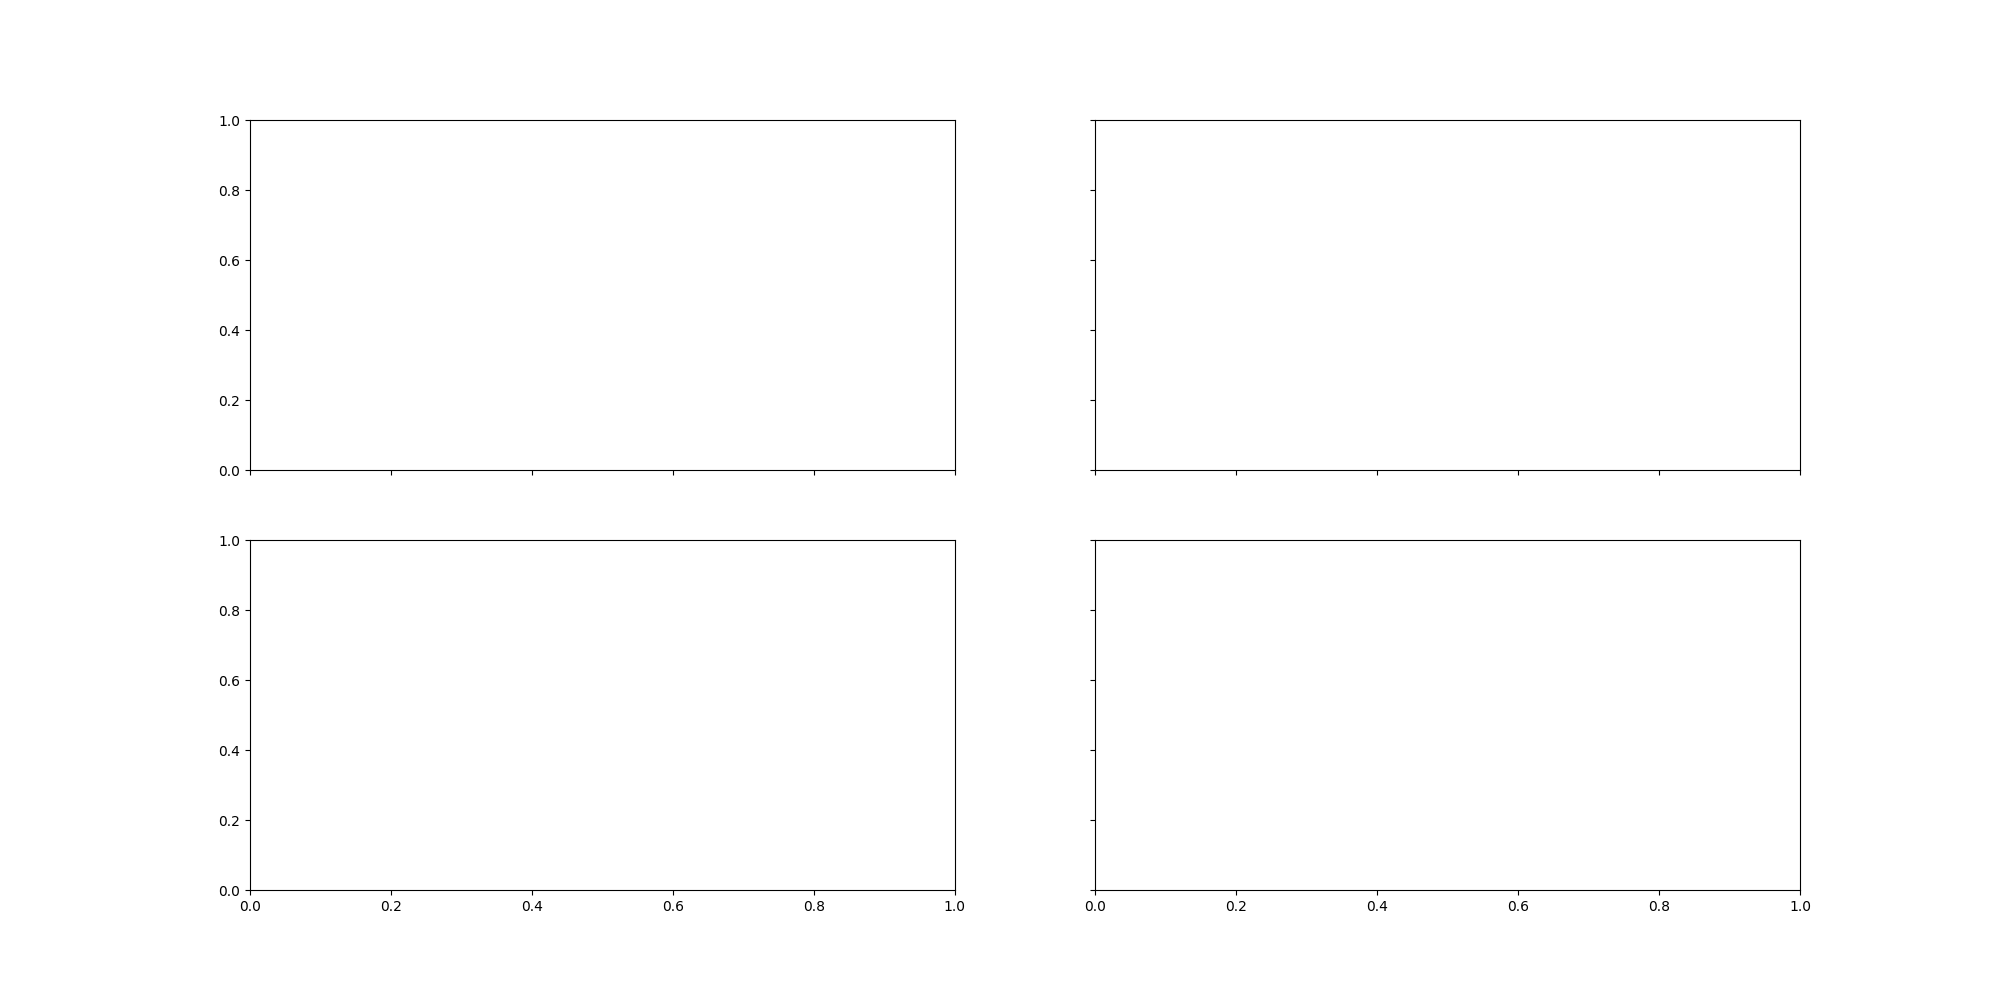

figupdate now


In [9]:
fig,axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(10*2,5*2))

async def update():
    t0 = time.time()
    tupd = t0
    tlim = 60
    tupdinterval = .5
    figupdate = True
    
    # lim = 0x100000000
    # data = np.random.randint(lim, size=1)
    
    rand_str = pico.read_until(b'\r').decode()
    rand = int(rand_str.split(' ')[1][:-1],16)
    data = np.array(rand)
    
    bins = np.arange(0,0x100+1,1)-0.5

    while time.time() - t0 < tlim:

        # data = np.append(data, np.random.randint(lim, size=1))
        rand_str = pico.read_until(b'\r').decode()
        rand = int(rand_str.split(' ')[1][:-1],16)
        data = np.append(data, rand)

        if figupdate:
            print('figupdate now')
            bytes_ = split_bytes(data)
            for ax, bs in zip(axs.ravel(), bytes_):
                ax.cla()
                ax.hist(bs, bins=bins, edgecolor='black')
                ax.margins(0,5e-3)
            fig.suptitle(f'{tlim - (time.time()-t0):.2f}s remaining - pico randombits')
            fig.canvas.draw()
            print('figupdate done')
            figupdate = False
            await asyncio.sleep(1e-9) # without any sleep, it will not draw
            tupd = time.time()
        
        figupdate = not figupdate and time.time() - tupd > tupdinterval
        if figupdate:
            # update in the next loop
            print('figupdate next')


    print('time is up')


loop = asyncio.get_event_loop()
loop.create_task(update());

In [22]:
rand_str = pico.read_until(b'\r').decode()
rand = int(rand_str.split(' ')[1][:-1],16)
data = np.array(rand)

for _ in trange(int(100e3)):
    rand_str = pico.read_until(b'\r').decode()
    rand = int(rand_str.split(' ')[1][:-1],16)
    data = np.append(data, rand)

print(data)
    

  0%|          | 0/100000 [00:00<?, ?it/s]

[2058016091  857728683 2008848882 ... 3010697566 2207478005 2873701803]


Text(0.5, 0.98, 'pico randombits')

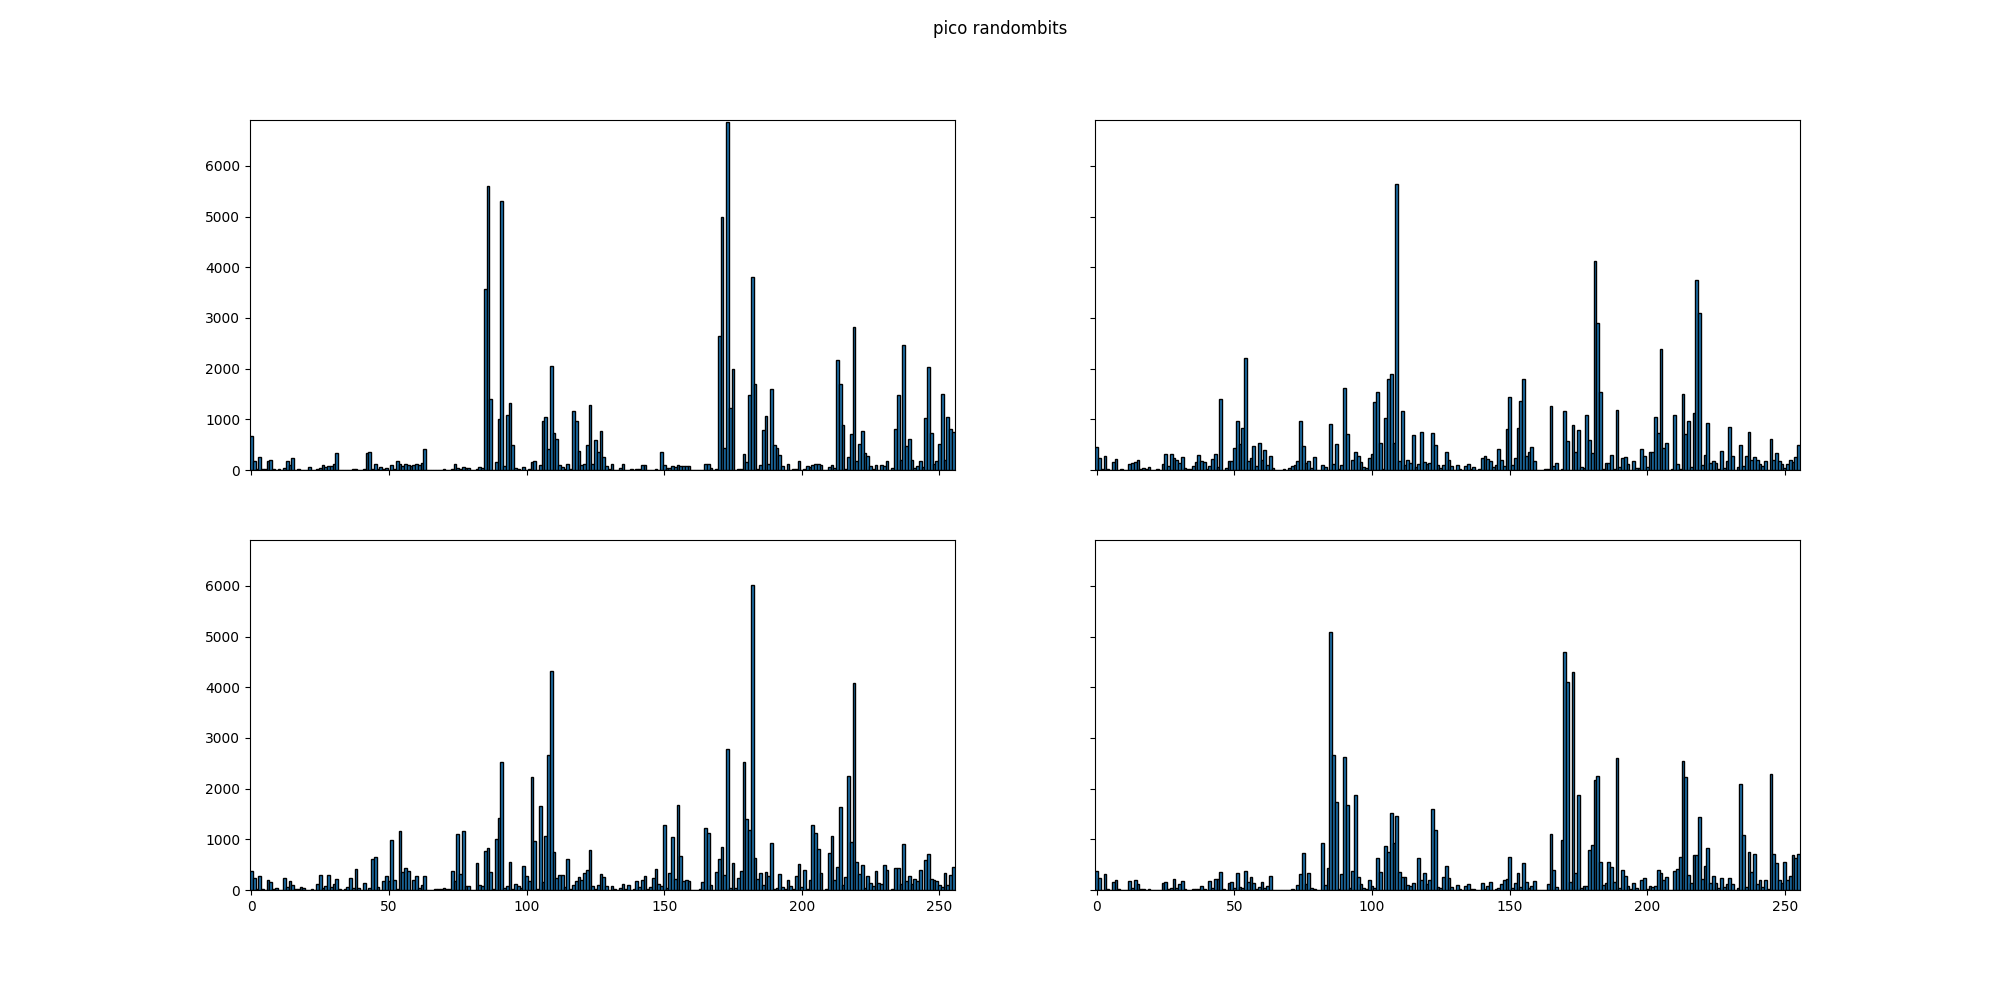

In [23]:
fig,axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(10*2,5*2))
bytes_ = split_bytes(data)
for ax, bs in zip(axs.ravel(), bytes_):
    ax.hist(bs, bins=bins, edgecolor='black')
    ax.margins(0,5e-3)
fig.suptitle(f'pico randombits')

In [25]:
lim = 0x10000000
data = np.random.randint(lim, size=5)

def split_bytes(uint32):
    return (uint32>>offset&0xff for offset in range(0,32,8))

data = np.append(data, np.random.randint(lim, size=5))
display(data)
list(split_bytes(data))

array([103016308, 139151839,  27888185, 237011058,  76501749,  53866027,
       177034619, 136718049, 255588967,  91094777])

[array([116, 223,  57, 114, 245,  43, 123, 225, 103, 249]),
 array([231,  73, 138, 128,  82, 238,  85,  38, 250, 254]),
 array([ 35,  75, 169,  32, 143,  53, 141,  38,  59, 109]),
 array([ 6,  8,  1, 14,  4,  3, 10,  8, 15,  5])]

In [26]:
(229<<0) | (243<<8) | (211<<16) | (12<<24)

215217125

In [27]:
list(split_bytes(215217125))

[229, 243, 211, 12]

In [28]:
pico.close()